In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [13]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [14]:
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
show_id         8807 non-null object
type            8807 non-null object
title           8807 non-null object
director        6173 non-null object
cast            7982 non-null object
country         7976 non-null object
date_added      8797 non-null object
release_year    8807 non-null int64
rating          8803 non-null object
duration        8804 non-null object
listed_in       8807 non-null object
description     8807 non-null object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
# Calculating missing data
for i in df.columns:
    null_rate = df[i].isna().sum()/len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [17]:
# country value counts
df['country'].value_counts()

United States                                    2818
India                                             972
United Kingdom                                    419
Japan                                             245
South Korea                                       199
                                                 ... 
Kuwait, United States                               1
United States, Greece, United Kingdom               1
United States, Ireland, United Kingdom, India       1
Norway, Denmark, Netherlands, Sweden                1
United States, Sweden, Norway                       1
Name: country, Length: 748, dtype: int64

Text(0, 0.5, 'Country')

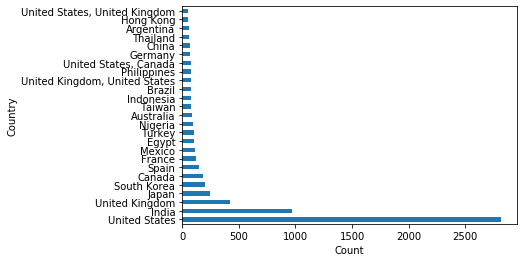

In [28]:
countryHist = df['country'].value_counts()[:25].plot(kind='barh', y ='Country', x= 'Count')

countryHist.set_xlabel("Count")
countryHist.set_ylabel("Country")

In [30]:
print(pd.unique(df['country']))

['United States' 'South Africa' nan 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'United States, United Kingdom, Canada' 'China, Hong Kong' 'Russia'
 'Canada' 'Hong Kong' 'United States, China, Hong Kong'
 'Italy, United States' 'United States, G

TO DO:

replace null in Director and Cast with Unknown
Remove objects with Null in country

Text(0, 0.5, 'Date Added')

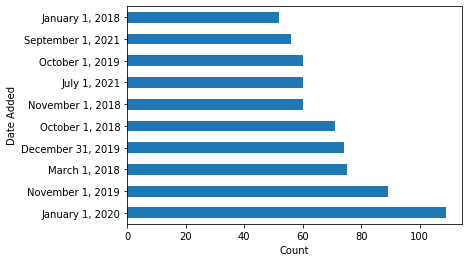

In [34]:
dateHist = df['date_added'].value_counts()[:10].plot(kind='barh', y ='Country', x= 'Count')

dateHist.set_xlabel("Count")
dateHist.set_ylabel("Date Added")

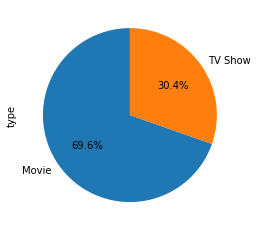

In [39]:
TypePie = df['type'].value_counts().plot.pie(startangle=90, autopct='%1.1f%%')

Text(0.5, 1.0, 'Number of movies by rating')

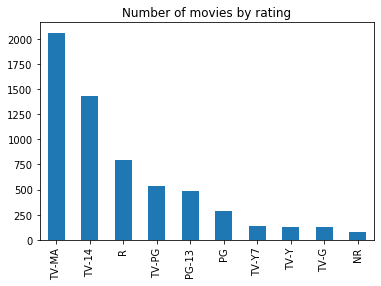

In [40]:
plot_movie_rating = df[df["type"]=="Movie"]["rating"].value_counts().head(10) 

plot_movie_rating.plot(kind="bar")
plt.title("Number of movies by rating")

Text(0.5, 1.0, 'Number of Tv Shows by rating')

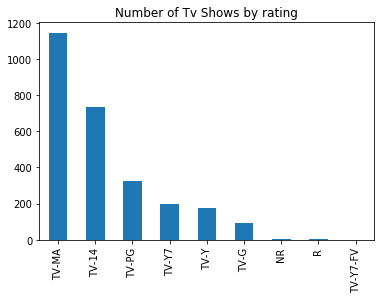

In [42]:
plot_movie_rating = df[df["type"]=="TV Show"]["rating"].value_counts().head(10) 

plot_movie_rating.plot(kind="bar")
plt.title("Number of Tv Shows by rating")